c:\Users\USER\Desktop\ms_ai\인공신경망(10월22일~)\DL3_20241006\ch03


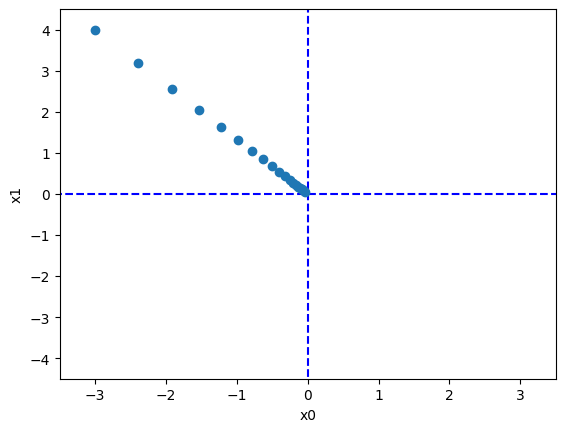

In [1]:
# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

#from gradient_2d import numerical_gradient
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x) #x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원

    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad

def gradient_decent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_decent(function_2, init_x, lr = lr, step_num=step_num)

plt.plot([-5,5], [0,0], '--b')
plt.plot([0,0], [-5,5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim([-3.5, 3.5])
plt.ylim([-4.5, 4.5])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


